## Problem 2: Calculate and visualise the *dominance areas* of shopping centres (10 points)

In this problem, the aim is to delineate the dominance area of each shopping centre. For this 
exercise, we define the ‘dominance area’ of a shopping centre as the area from which it can 
be reached faster than other shopping centres. We will use public transport travel times.

![](images/dominance_areas_example_1000x500px.png)

*Sample result: a map showing the areas of dominance of each shopping centre, and the travel 
times to the closest shopping centre in the entire metropolitan area*



---

### Data

The **input data** is identical to what you have used for *problem 1*, 
see [there](./Exercise-4-problem-1.ipynb) for detailed data descriptions.

---


### An overview of the tasks

This task comprises of three major subtasks. In contrast to earlier exercises, we 
do not provide a detailed, step-by-step ‘cooking recipe’. Rather, you are free to
implement the necessary steps in any order you see fit, and choose any variable
names of your liking. 

To test intermediate results, implement `assert` statements, output the `head()`
of a data frame, or plot the data. Remember to add comments to all of your code,
so future you (and us) can understand what each section does.

The **only strict requirement** is the **file name** of
the **output** map plot: `DATA_DIRECTORY / "dominance_areas.png"`.

1. Load the YKR grid and the individual travel time data sets, and combine them 
   into one geo data frame. This is essentially the same as *problem 1*, except
   that you must load all eight shopping centre data files.
2. Find the closest shopping centre to each grid cell. In the combined data set,
   find the minimum travel time to any of the shopping centres, save the value in
   a new column, and shopping centre name in another new column.
   See the [hints](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-4/exercise-4.html#hints)
   to this exercise for a suggestions on how to achieve this 
   ([`pandas.DataFrame.min()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html) and
   [`pandas.DataFrame.idxmin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)
   will be helpful)
3. Visualise the dominance areas and travel times. Use 2⨉1 subplots to plot
   the most dominant (closest) shopping centre for each grid cell, and the
   travel time to the closest shopping centre for each grid cell.

---


In [1]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

In [14]:
# ADD YOUR OWN CODE HERE
import geopandas as gpd

grid = gpd.read_file(
    DATA_DIRECTORY / "YKR_grid_EPSG3067.gpkg"
)

In [15]:
# ADD YOUR OWN CODE HERE
import pandas as pd
import numpy as np

# read and process each shopping center
for fp in DATA_DIRECTORY.glob("travel_times_to_*.txt"):
    print(fp.name)
    # travel_times_to_5980260_Ruoholahti.txt
    shopping_centre = fp.name[24:-4]
    if f"pt_r_t_{shopping_centre}" in grid.columns:
        continue
    data = pd.read_csv(
        fp,
        sep=";",
        usecols=['from_id', 'to_id', 'pt_r_t']
    )
    data = data.rename(columns={
        "pt_r_t": shopping_centre
    })
    data[shopping_centre] = data[shopping_centre].replace(-1, np.inf)

    grid = grid.merge(data, how='left', left_on='YKR_ID', right_on='from_id') # left key = right key
    grid = grid.drop(columns=["from_id", "to_id"])

travel_times_to_5980260_Ruoholahti.txt
travel_times_to_5902043_Myyrmanni.txt
travel_times_to_5878087_Dixi.txt
travel_times_to_5878070_Jumbo.txt
travel_times_to_5978593_Iso_Omena.txt
travel_times_to_5944003_Itis.txt
travel_times_to_5975373_Forum.txt


In [16]:
# ADD YOUR OWN CODE HERE
grid.head()

,YKR_ID,geometry,Ruoholahti,Myyrmanni,Dixi,Jumbo,Iso_Omena,Itis,Forum
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",118.0,90.0,102.0,101.0,141.0,132.0,110.0
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",121.0,93.0,109.0,108.0,143.0,135.0,113.0
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",123.0,95.0,111.0,109.0,145.0,137.0,115.0
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",127.0,99.0,115.0,114.0,149.0,141.0,119.0
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",111.0,83.0,99.0,98.0,134.0,125.0,103.0


In [17]:
# ADD YOUR OWN CODE HERE
if "dominance_centre" in grid.columns:
    grid = grid.drop(columns=["dominance_centre"])
grid["dominance_centre"] = grid.drop(columns=['YKR_ID', 'geometry']).idxmin(axis=1)
# grid["dominance_centre"] = grid[["dominance_centre"]].apply(lambda x : x[7:])

In [20]:
# ADD YOUR OWN CODE HERE
if "dominance_time" in grid.columns:
    grid = grid.drop(columns=["dominance_time"])
grid["dominance_time"] = grid.drop(columns=['YKR_ID', 'geometry', 'dominance_centre']).min(axis=1)

In [21]:
grid.head()

,YKR_ID,geometry,Ruoholahti,Myyrmanni,Dixi,Jumbo,Iso_Omena,Itis,Forum,dominance_centre,dominance_time
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",118.0,90.0,102.0,101.0,141.0,132.0,110.0,Myyrmanni,90.0
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",121.0,93.0,109.0,108.0,143.0,135.0,113.0,Myyrmanni,93.0
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",123.0,95.0,111.0,109.0,145.0,137.0,115.0,Myyrmanni,95.0
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",127.0,99.0,115.0,114.0,149.0,141.0,119.0,Myyrmanni,99.0
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",111.0,83.0,99.0,98.0,134.0,125.0,103.0,Myyrmanni,83.0


/Users/shuaiyizhang/Develop/AutoGIS/.venv/lib/python3.11/site-packages/mapclassify/classifiers.py:931: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/Users/shuaiyizhang/Develop/AutoGIS/.venv/lib/python3.11/site-packages/mapclassify/classifiers.py:963: RuntimeWarning: invalid value encountered in scalar divide
  gadf = 1 - self.adcm / adam


Text(0.5, 1.0, 'Travel Time')

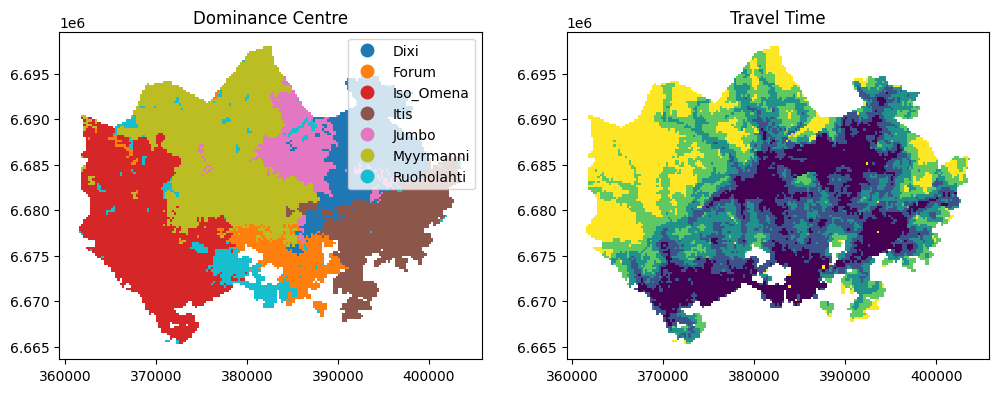

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12,8))
ax1 = axes[0]
ax2 = axes[1]

grid.plot(
    ax=ax1,
    column='dominance_centre',
    linewidth=0,
    legend=True
)

grid.plot(
    ax=ax2,
    column='dominance_time',
    scheme='Quantiles',
    linewidth=0,
)
ax1.set_title("Dominance Centre")
ax2.set_title("Travel Time")

In [30]:
fig.savefig(
    DATA_DIRECTORY / "dominance_areas.png"
)

In [31]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
assert (DATA_DIRECTORY / "dominance_areas.png").exists()


--- 

**Do not forget to plot the result map, and save it to `DATA_DIRECTORY / "dominance_areas.png"`!**

---

## Reflections

This was a significantly more complex exercise that previous ones, and it included finding
a solution yourself. 

- What was most difficult part? 
- Where did you get stuck? 
- What was the easiest, and
- what was the most fun part of this exercise?

Add your answer below


---

## Well done!

Congratulations, you completed exercise 4. Good Job!